In [214]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

# Loads in dataset from project dataset
cars = pd.read_csv('../data/Project1Data/project1.data')

# Data Tidying

In [215]:
# Returns size & shape of the raw dataset
cars.shape

(398, 9)

In [216]:
cars.info()
print(cars.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


### From the above output we can see that none of the variables are missing any values & none are null

In [217]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [218]:
cars.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [219]:
# Creates a map for the origin values to instead be American, European, Japanese
# for easier boolean conversion.
country_Map = {1:'American',2:'European',3:'Japanese'}
cars['Country'] = cars['origin'].map(country_Map)
# changes the country from na object to a category
cars['Country'] = cars['Country'].astype('category')

# changes car names to keep only the make of the car
cars['car_make'] = cars['car_name'].str.split().str[0].astype('category')

# changes horsepower from an object to an integer value
# corrects the '?' value found at row 32 & changes the data type from object to a float
cars['horsepower'] = pd.to_numeric(cars['horsepower'], errors= 'coerce')
cars['horsepower'] = cars['horsepower'].fillna(0)
# replaces 0 values with the median horsepower value
cars.loc[cars.horsepower == 0, 'horsepower'] = cars.horsepower.median()

In [220]:
# dropping origin & car_name columns, as they've been adjusted already into Country & car_make
cars = cars.drop(['car_name','origin'],axis = 1)
# making dummy variables via encoding for Country & car_make
cars = pd.get_dummies(cars, columns=["Country"], drop_first=True)
# car_make is not included as there are typos to be fixed!
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   mpg               398 non-null    float64 
 1   cylinders         398 non-null    int64   
 2   displacement      398 non-null    float64 
 3   horsepower        398 non-null    float64 
 4   weight            398 non-null    int64   
 5   acceleration      398 non-null    float64 
 6   model_year        398 non-null    int64   
 7   car_make          398 non-null    category
 8   Country_European  398 non-null    bool    
 9   Country_Japanese  398 non-null    bool    
dtypes: bool(2), category(1), float64(4), int64(3)
memory usage: 24.4 KB


In [221]:
# Tidying data to remove duplicates & properly group car makes together
cars['car_make'] = cars['car_make'].str.replace('chevroelt','chevrolet')
cars['car_make'] = cars['car_make'].str.replace('maxda','mazda')
cars['car_make'] = cars['car_make'].str.replace('mercedes-benz','mercedes')
cars['car_make'] = cars['car_make'].str.replace('toyouta','toyota')
cars['car_make'] = cars['car_make'].str.replace('vokswagen','volkswagen')
cars['car_make'] = cars['car_make'].str.replace('vw','volkswagen')

In [222]:
cars = pd.get_dummies(cars, columns = ['car_make'], drop_first = True)
# Displaying the tidied dataframe
print(cars.info())
# Printing the shape of our dataframe
print(cars.shape)
# shows there are 0  duplicate entries!
cars.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mpg                  398 non-null    float64
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   model_year           398 non-null    int64  
 7   Country_European     398 non-null    bool   
 8   Country_Japanese     398 non-null    bool   
 9   car_make_audi        398 non-null    bool   
 10  car_make_bmw         398 non-null    bool   
 11  car_make_buick       398 non-null    bool   
 12  car_make_cadillac    398 non-null    bool   
 13  car_make_capri       398 non-null    bool   
 14  car_make_chevrolet   398 non-null    bool   
 15  car_make_chevy       398 non-null    boo

0

In [223]:
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.281407,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.229470,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# Data Visualization

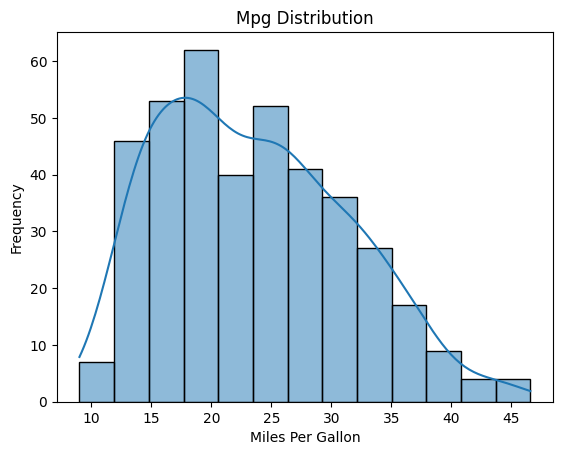

In [224]:
# Constructing a histogram of MPG
fig = sns.histplot(data = cars, x = 'mpg', kde = True)
fig.set(xlabel = 'Miles Per Gallon', ylabel = 'Frequency', title = 'Mpg Distribution')
plt.show()

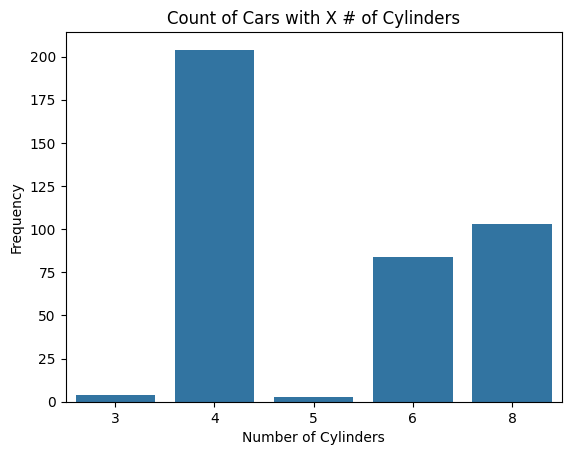

In [225]:
fig = sns.countplot(data = cars, x = 'cylinders')
fig.set(xlabel = 'Number of Cylinders', ylabel = 'Frequency',
        title = 'Count of Cars with X # of Cylinders')
plt.show()

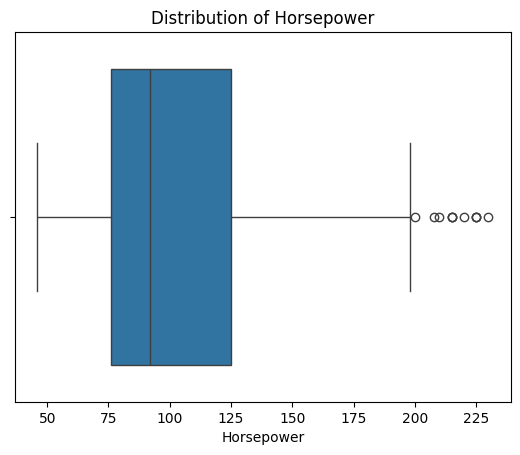

In [226]:
fig = sns.boxplot(data = cars, x= 'horsepower')
fig.set(xlabel = 'Horsepower', title = 'Distribution of Horsepower')
plt.show()

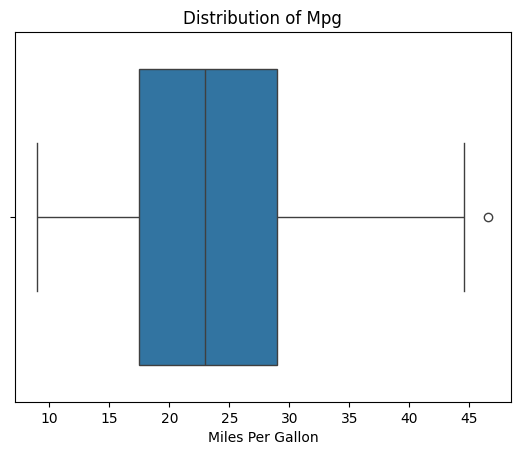

In [227]:
fig = sns.boxplot(data = cars, x= 'mpg')
fig.set(xlabel = 'Miles Per Gallon', title = 'Distribution of Mpg')
plt.show()

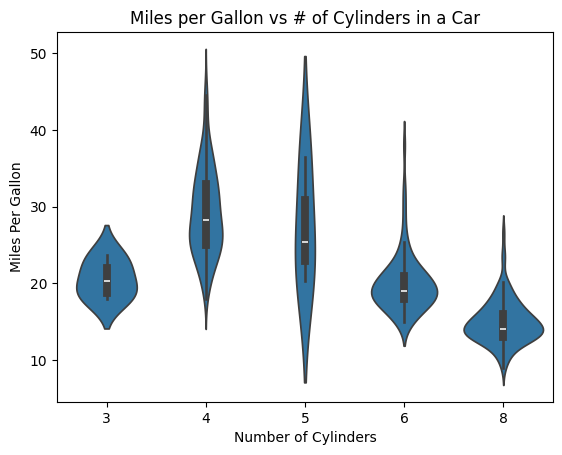

In [228]:
fig = sns.violinplot(data = cars, y = 'mpg', x ='cylinders')
fig.set(xlabel = 'Number of Cylinders', ylabel = 'Miles Per Gallon',
        title = 'Miles per Gallon vs # of Cylinders in a Car')
plt.show()

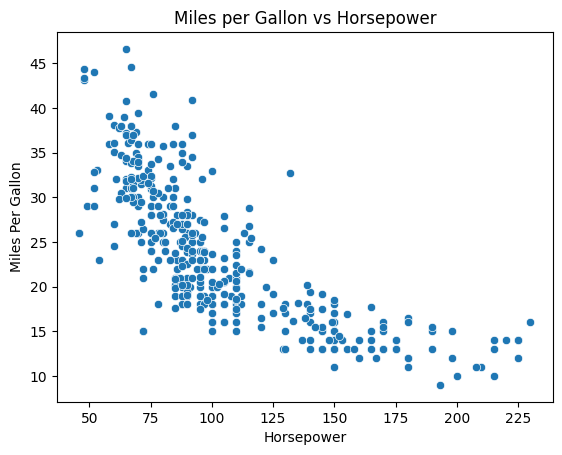

In [229]:
fig = sns.scatterplot(data = cars, y = 'mpg', x ='horsepower')
fig.set(xlabel = 'Horsepower', ylabel = 'Miles Per Gallon',
        title = 'Miles per Gallon vs Horsepower')
plt.show()

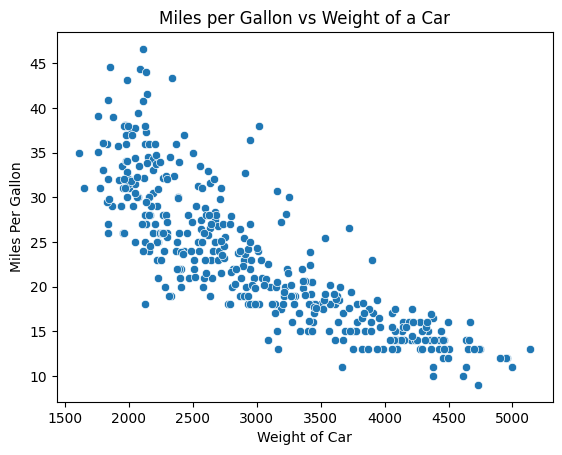

In [230]:
fig = sns.scatterplot(data = cars, y = 'mpg', x ='weight')
fig.set(xlabel = 'Weight of Car', ylabel = 'Miles Per Gallon',
        title = 'Miles per Gallon vs Weight of a Car')
plt.show()

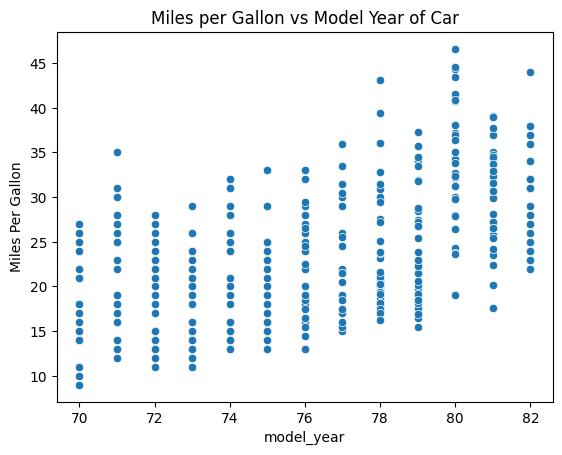

In [231]:
fig = sns.scatterplot(data = cars, y = 'mpg', x ='model_year')
fig.set(xlabel = 'model_year', ylabel = 'Miles Per Gallon',
        title = 'Miles per Gallon vs Model Year of Car')
plt.show()

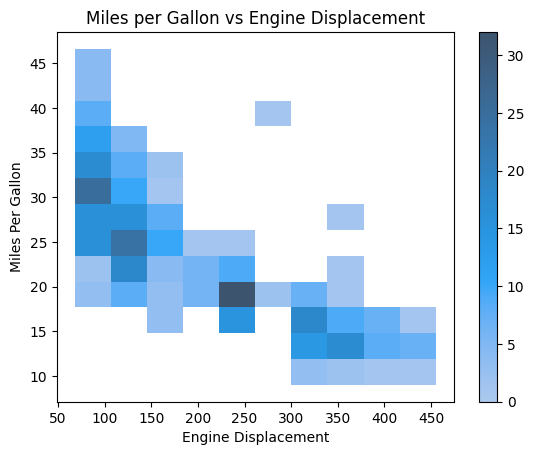

In [232]:
fig = sns.histplot(data = cars,
                   y = 'mpg', x ='displacement', cbar = True)
fig.set(xlabel = 'Engine Displacement', ylabel = 'Miles Per Gallon',
        title = 'Miles per Gallon vs Engine Displacement')
plt.show()

### Below is a correlation heatmap, where we can see the relationship that each variable has with one another! Where negative values indicate an inverse relationship while, positive values indicate a linear one!

### I dropped the car_make variables for clarity.

<Axes: >

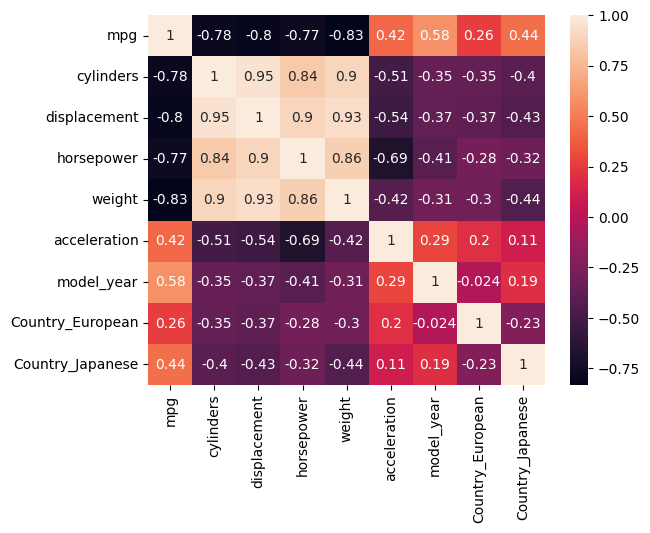

In [233]:
cars2 = cars.drop(cars.loc[:,'car_make_audi':'car_make_volvo'],axis = 1)
# computes pairwise correlation of columns, painting a relevant picture of the relationship
# between each variable!
cars_corr = cars2.corr()
sns.heatmap(cars_corr, annot = True)

## Effect of variables on fuel efficiency of automobiles

From the heatmap above, we have a strong insight as to which variables will have the greatest affect on the fuel efficiency (mpg) of a vehicle. Clearly, we see that displacement, weight, horsepower, and cylinders are the forefront of what makes a vehicle decline in fuel efficiency as according to our data. This is due to the large negative correlation between those variables and mpg. Additionally, we can see that the year of a car has a meaningful affect as well, by having a 0.58 correlation. This makes sense as newer cars will generally have a much better fuel efficiency as comapred to older vehicles. This same trend for the formerly listed variables is also seen in the above bi-variate plots as well.

# Machine Learning Model

In [234]:
# Setting our independent & dependents
X = cars.drop(['mpg'],axis = 1)
Y = cars['mpg']
lr = linear_model.LinearRegression()
# Constructing Test & Train data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 1)
# Constructing linear fit
lr.fit(X_train,Y_train)

LinearRegression()

In [235]:
# puts regression coefficents into a data frame for easier reading/use.
regression_data = pd.DataFrame(lr.coef_, X.columns, columns = ['Coeff'])
print(regression_data, '\nIntercept       ',lr.intercept_)

                            Coeff
cylinders           -2.602419e-01
displacement         2.023488e-02
horsepower          -3.329720e-02
weight              -6.562326e-03
acceleration        -4.025145e-02
model_year           7.523114e-01
Country_European     3.650138e+00
Country_Japanese     3.157919e+00
car_make_audi        4.682698e-01
car_make_bmw         8.326673e-15
car_make_buick       1.540098e+00
car_make_cadillac    4.256316e+00
car_make_capri       1.282538e+00
car_make_chevrolet   8.840337e-01
car_make_chevy       3.954847e+00
car_make_chrysler    3.163234e+00
car_make_datsun      1.638641e+00
car_make_dodge       1.489791e+00
car_make_fiat        5.618889e-01
car_make_ford        5.148242e-01
car_make_hi          5.201401e+00
car_make_honda       1.444302e+00
car_make_mazda      -4.255011e-01
car_make_mercedes    2.279236e+00
car_make_mercury    -6.336111e-01
car_make_nissan      2.162480e+00
car_make_oldsmobile  2.666590e+00
car_make_opel       -1.947801e+00
car_make_peuge

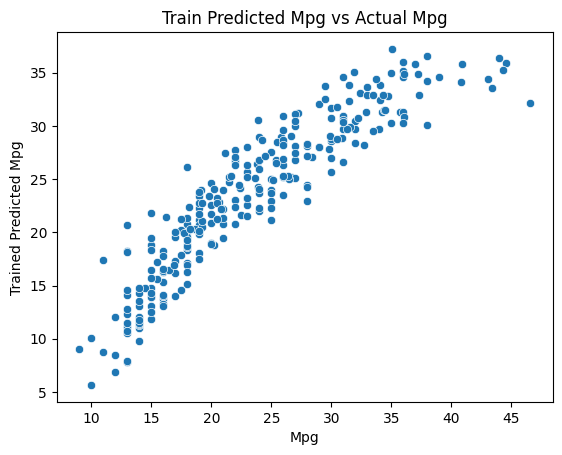

R_train Squared Score:  0.8401773174807473


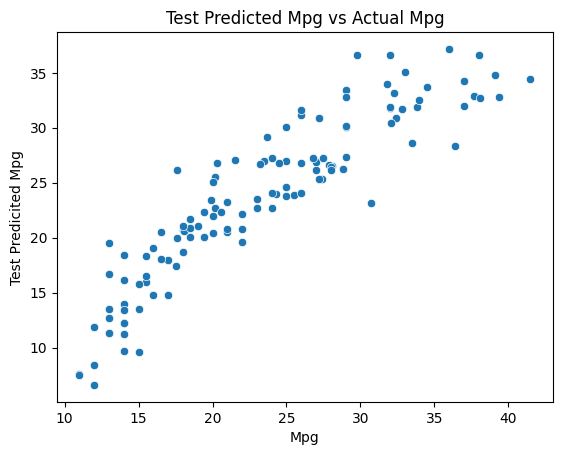

R_test Squared Score:  0.8225713089507171


In [236]:
predictions_test = lr.predict(X_test)
predictions_train = lr.predict(X_train)

r_score_test = r2_score(Y_test, predictions_test)
r_score_train = r2_score(Y_train, predictions_train)

figtest = sns.scatterplot(y = predictions_train, x = Y_train )
figtest.set(xlabel = 'Mpg', ylabel = 'Trained Predicted Mpg', title = 'Train Predicted Mpg vs Actual Mpg')
plt.show()
print('R_train Squared Score: ' , r_score_train)

figtest = sns.scatterplot(y = predictions_test, x = Y_test )
figtest.set(xlabel = 'Mpg', ylabel = 'Test Predicited Mpg', title = 'Test Predicted Mpg vs Actual Mpg')
plt.show()
print('R_test Squared Score: ' ,r_score_test)

## Second Linear Regression Model

In [237]:
# Setting our independent & dependents
X = cars2.drop(['mpg'],axis = 1)
Y = cars2['mpg']
lr = linear_model.LinearRegression()
# Constructing Test & Train data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 1)
# Constructing linear fit
lr.fit(X_train,Y_train)

LinearRegression()

In [238]:
# puts regression coefficents into a data frame for easier reading/use.
regression_data = pd.DataFrame(lr.coef_, X.columns, columns = ['Coeff'])
print(regression_data, '\nIntercept       ',lr.intercept_)

                     Coeff
cylinders        -0.394635
displacement      0.028954
horsepower       -0.021815
weight           -0.007350
acceleration      0.061586
model_year        0.836870
Country_European  3.002565
Country_Japanese  2.397383 
Intercept        -21.27660194088234


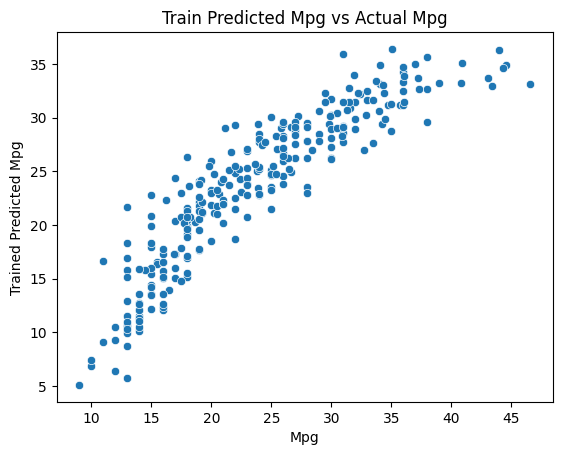

R_train Squared Score:  0.814103252665064


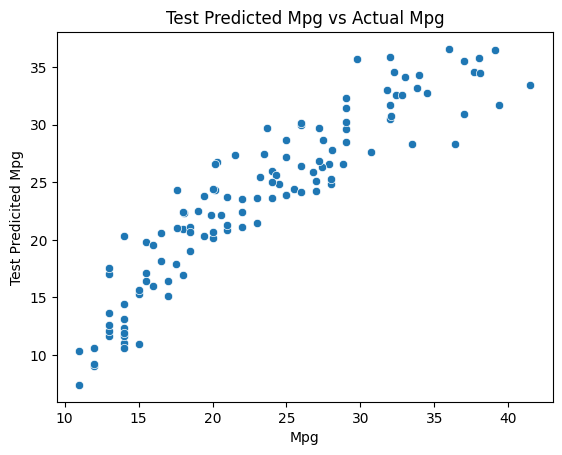

R_test Squared Score:  0.8433393850315531


In [239]:
predictions_test = lr.predict(X_test)
predictions_train = lr.predict(X_train)

r_score_test = r2_score(Y_test, predictions_test)
r_score_train = r2_score(Y_train, predictions_train)

figtest = sns.scatterplot(y = predictions_train, x = Y_train )
figtest.set(xlabel = 'Mpg', ylabel = 'Trained Predicted Mpg', title = 'Train Predicted Mpg vs Actual Mpg')
plt.show()
print('R_train Squared Score: ' , r_score_train)

figtest = sns.scatterplot(y = predictions_test, x = Y_test )
figtest.set(xlabel = 'Mpg', ylabel = 'Test Predicited Mpg', title = 'Test Predicted Mpg vs Actual Mpg')
plt.show()
print('R_test Squared Score: ' ,r_score_test)

## Which model performed better?

With linear regression, the test accuracy or R_squared value, is how we assess the models performance and applicability. As such, we need to look at our R_squared value for the test data sets for both models.

From which we find that the model that included the car_make variables, had a slightly lower R_squared of 0.822, while the model that excluded the car_make variables had a R_squared value of 0.843. A slight difference but an improvement nonehte less. Additionally, within both models the Training R_squared score was quite close to the test data R_squared, indicating that the models created are performing well, even outside of the training data. As an overfit, or even underfit model would perform well on the training data, but quite poorly on the Test dataset.

Thus, the accuracy of our models R_squared, is relevant to our problem as it gives insight to the overall performance of the model if new data is to be tested.